In [8]:
"""
Chapter_1.10.1. Plot the decision surface of a decision tree on the iris dataset
参考
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

In [10]:
# Load data
iris = load_iris()

print(iris.data[0:5,:])
print(iris.data.shape)
print(iris.target.shape)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
(150, 4)
(150,)


In [17]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    print(pair)

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]


In [18]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    print(pairidx)

0
1
2
3
4
5


3.3
8.9
1.0
5.4
[[ 3.3   3.32  3.34 ...,  8.84  8.86  8.88]
 [ 3.3   3.32  3.34 ...,  8.84  8.86  8.88]
 [ 3.3   3.32  3.34 ...,  8.84  8.86  8.88]
 ..., 
 [ 3.3   3.32  3.34 ...,  8.84  8.86  8.88]
 [ 3.3   3.32  3.34 ...,  8.84  8.86  8.88]
 [ 3.3   3.32  3.34 ...,  8.84  8.86  8.88]]
[[ 1.    1.    1.   ...,  1.    1.    1.  ]
 [ 1.02  1.02  1.02 ...,  1.02  1.02  1.02]
 [ 1.04  1.04  1.04 ...,  1.04  1.04  1.04]
 ..., 
 [ 5.34  5.34  5.34 ...,  5.34  5.34  5.34]
 [ 5.36  5.36  5.36 ...,  5.36  5.36  5.36]
 [ 5.38  5.38  5.38 ...,  5.38  5.38  5.38]]
[[0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


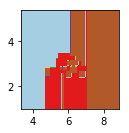

In [13]:
# We only take the two corresponding features
X = iris.data[:, [0, 1]]
y = iris.target

# Train
clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary
plt.subplot(2, 3, pairidx + 1)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

print(x_min)
print(x_max)
print(y_min)
print(y_max)
print(xx)
print(yy)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.show()

In [19]:
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
 
# PDFファイルに出力
graph.write_pdf("graph.pdf")
#from IPython.display import Image
#Image(graph.create_png())

True

In [15]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

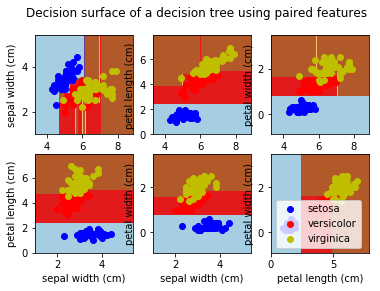

In [16]:
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()